In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.utils import to_categorical


In [5]:

from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data   # Features
y = iris.target # Labels

from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)



In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, input_shape=(4,), activation='relu'),  # Hidden layer with 10 neurons
    Dense(3, activation='softmax')                   # Output layer with 3 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [12]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 245ms/step - accuracy: 0.8190 - loss: 0.6783 - val_accuracy: 0.8750 - val_loss: 0.6147
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8190 - loss: 0.6609 - val_accuracy: 0.8750 - val_loss: 0.6060
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7995 - loss: 0.6714 - val_accuracy: 0.8750 - val_loss: 0.5981
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.8516 - loss: 0.6367 - val_accuracy: 0.8750 - val_loss: 0.5899
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8242 - loss: 0.6305 - val_accuracy: 0.8750 - val_loss: 0.5818
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.8516 - loss: 0.6258 - val_accuracy: 0.8750 - val_loss: 0.5740
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8789 - loss: 0.6126 - val_accuracy: 0.8750 - val_loss: 0.5661
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.8203 - loss: 0.6146 - val_accuracy: 0.8750 - val_loss: 0

In [13]:
# Evaluate accuracy
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 0.86
Test Accuracy: 0.97


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # predicted class index
y_true = np.argmax(y_test, axis=1)          # true class index


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


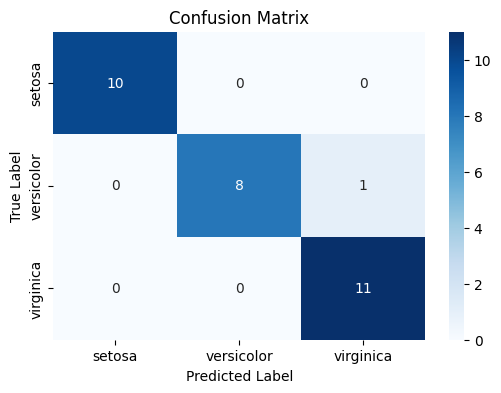

In [15]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [16]:
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=iris.target_names))


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



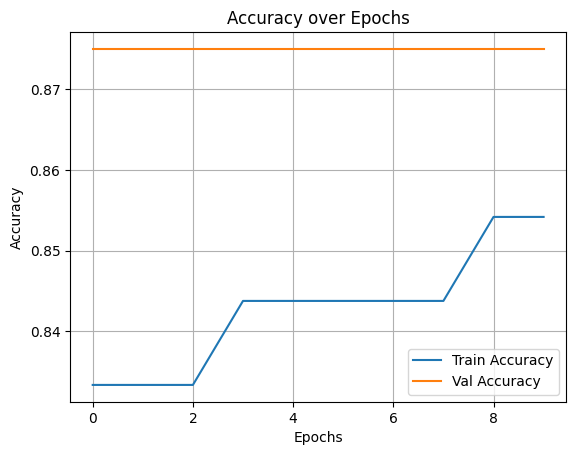

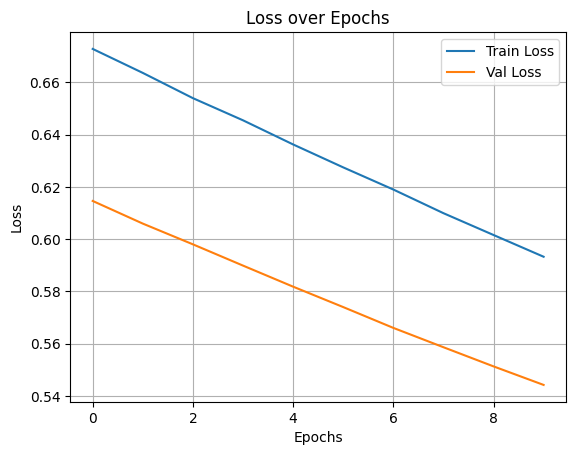

In [17]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
